# *Dimentional_Reduction_techniques*
---

In [233]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns;sns.set()
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from datetime import datetime,time
import os

In [234]:
df=pd.read_csv(r"Data_set/new_cleaned_df.csv")
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,94,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,102,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,128,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


---
### *Data Shape :*

In [235]:
df.shape

(205, 26)

---
### *Data Info :*

In [236]:
# Show info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    int64  
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

---
#### *Na-Values & Duplicated rows*

In [237]:
print("The Total Number of Null Values are : ", df.isna().sum().sum())
print("The Total Number of duplicated rows are : ", df.duplicated().sum())

The Total Number of Null Values are :  0
The Total Number of duplicated rows are :  0


In [238]:
categorical_features=df.select_dtypes(include=["object"])
numerical_features=df.select_dtypes(exclude=["object"])

---
#### *Prepare Data*

In [194]:
from sklearn.preprocessing import (
        LabelEncoder,StandardScaler,PowerTransformer,StandardScaler,OneHotEncoder,OrdinalEncoder,RobustScaler,MinMaxScaler
        )

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(sparse_output=False)
ordinal_encoder = OrdinalEncoder()

x=df.drop("fuel_type",axis=1)
y=df["fuel_type"]
y=y.map({'diesel' : 0,'gas': 1})

categorical_features=x.select_dtypes(include=["object"])
numerical_features=x.select_dtypes(exclude=["object"])

oh_columns =categorical_features.columns.to_list()
transform_columns = numerical_features.columns.to_list()
num_features = numerical_features.columns.to_list()

transform_pipe = Pipeline(steps=[
                ('transformer', PowerTransformer(method='yeo-johnson'))

            ])
preprocessor = ColumnTransformer(
                [
                    ("OneHotEncoder", oh_transformer, oh_columns),
                    ("Transformer", transform_pipe, transform_columns),
                    ("StandardScaler", numeric_transformer, num_features),
                    
                ]
            )

preprocessed_data=preprocessor.fit_transform(x)
preprocessed_data.shape

(205, 90)

---
### *PCA*

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(205, 90)


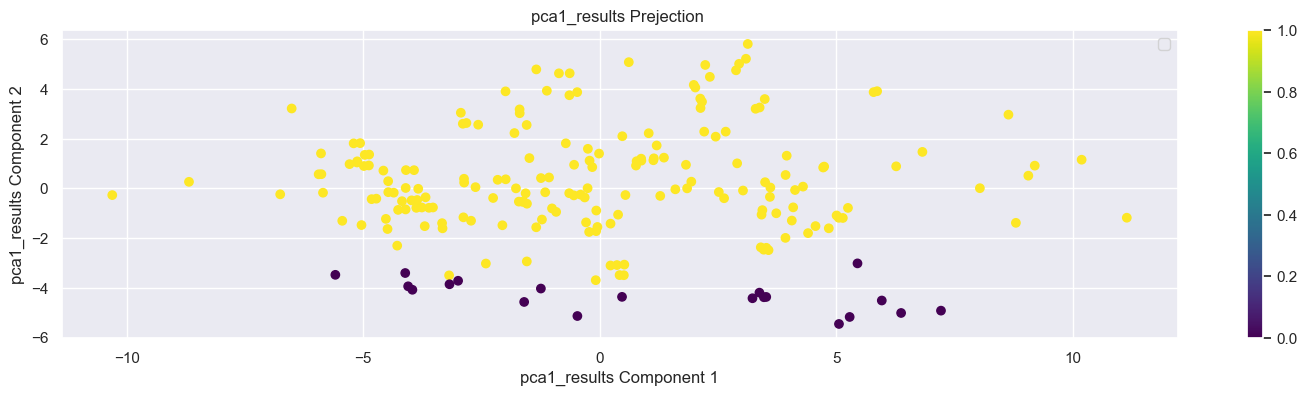

In [ ]:
from sklearn.decomposition import PCA
import plotly.express as px
pca1=PCA()
pca1_results=pca1.fit_transform(preprocessed_data)
print(pca1_results.shape)
plt.figure(figsize=(18, 4))
plt.scatter(pca1_results[:, 0], pca1_results[:, 1],c=y,cmap='viridis')
plt.legend()
plt.title("pca1_results Prejection ")
plt.xlabel("pca1_results Component 1")
plt.ylabel("pca1_results Component 2")
plt.colorbar()
plt.grid(True)
plt.show();

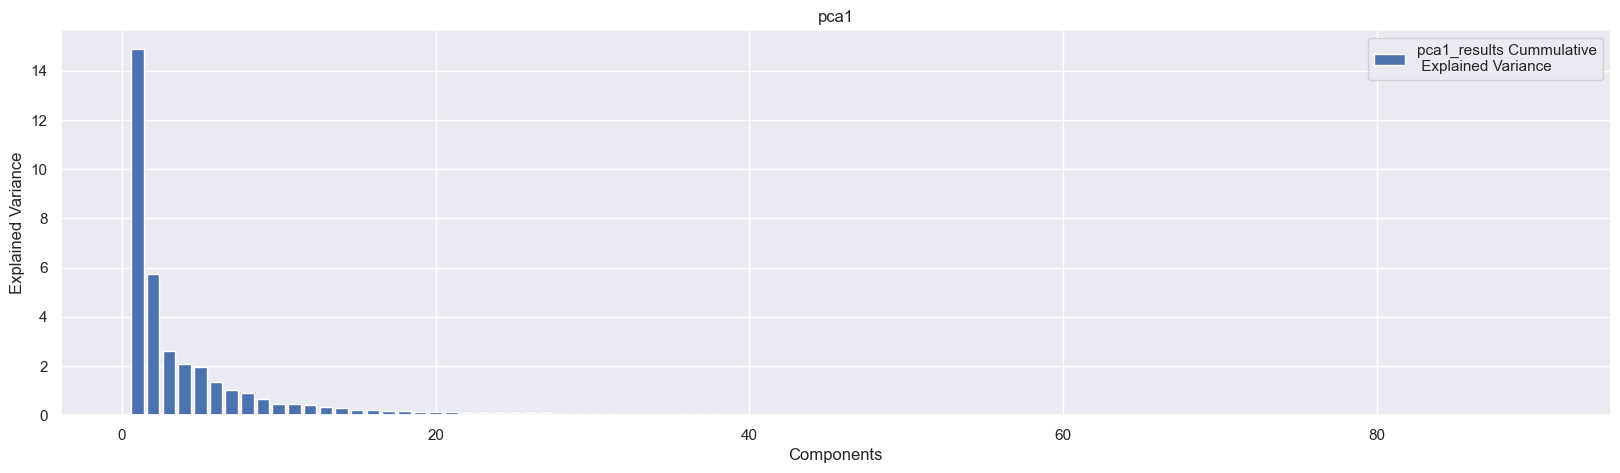

In [241]:
plt.figure(figsize=(20, 5))
plt.bar(range(1,len(pca1.explained_variance_)+1),pca1.explained_variance_,label="pca1_results Cummulative\n Explained Variance ")
plt.ylabel("Explained Variance")
plt.xlabel("Components")
plt.title("pca1")
plt.legend(loc="upper right");

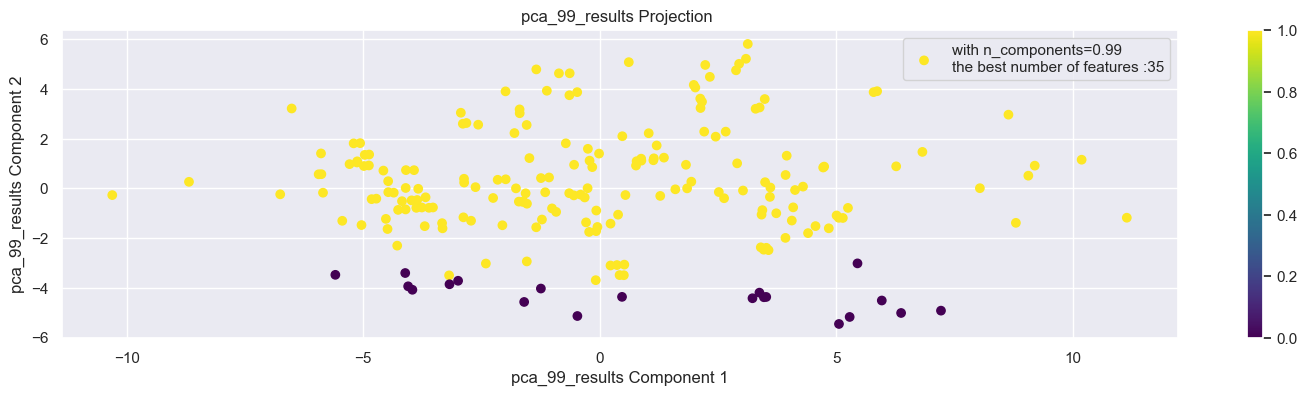

In [242]:
pca_99=PCA(n_components=.99)
pca_99_results=pca_99.fit_transform(preprocessed_data)
plt.figure(figsize=(18, 4))
plt.scatter(pca_99_results[:, 0], pca_99_results[:, 1],c=y,cmap='viridis',label=f"with n_components=0.99 \nthe best number of features :{pca_99_results.shape[1]}")
plt.legend()
plt.title("pca_99_results Projection ")
plt.xlabel("pca_99_results Component 1")
plt.ylabel("pca_99_results Component 2")
plt.colorbar()
plt.grid(True)
plt.show();


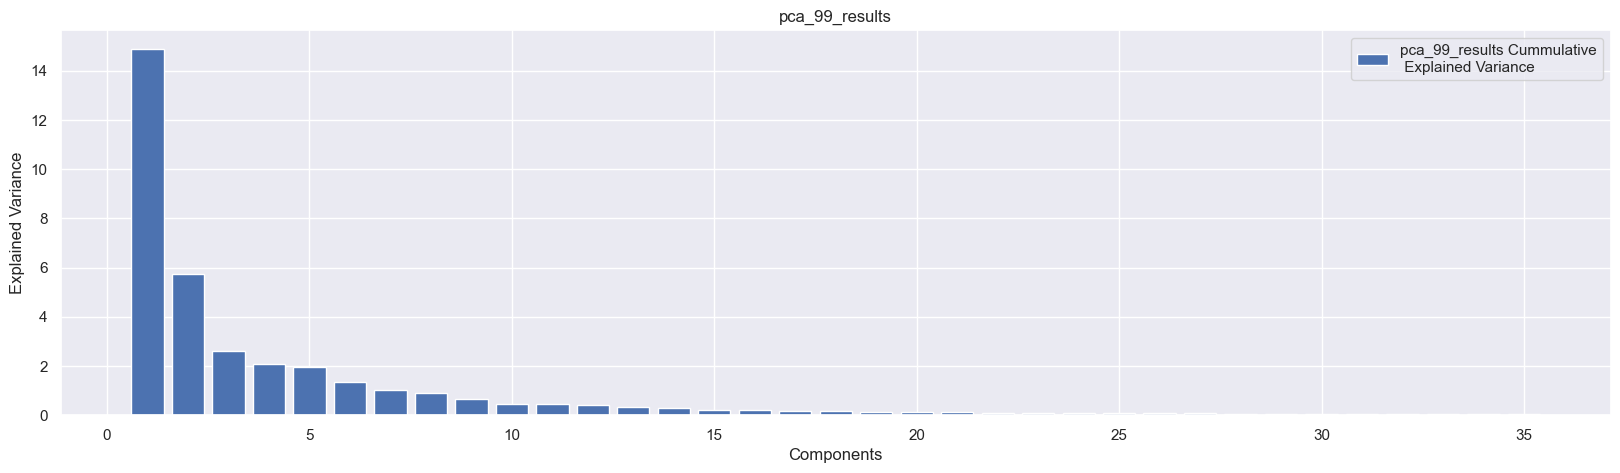

In [243]:
plt.figure(figsize=(20, 5))
plt.bar(range(1,len(pca_99.explained_variance_)+1),pca_99.explained_variance_,label="pca_99_results Cummulative\n Explained Variance ")
plt.ylabel("Explained Variance")
plt.xlabel("Components")
plt.title("pca_99_results")
plt.legend(loc="upper right");

In [244]:
np.sum(pca_99.explained_variance_ratio_)

0.9900519034348404

In [245]:
np.random.seed(42)
pca_3c=PCA(n_components=3)
pca_3c_results=pca_3c.fit_transform(preprocessed_data)
fig=px.scatter_3d(
    pca_3c_results,x=0,y=1,z=2,color=y
)
fig.update_layout(
    title_text="pca_3c_results Projection",
    legend_title_text='y'    
)
fig.show()

---
### *TSNE*

In [246]:
from sklearn.manifold import TSNE

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(205, 2)


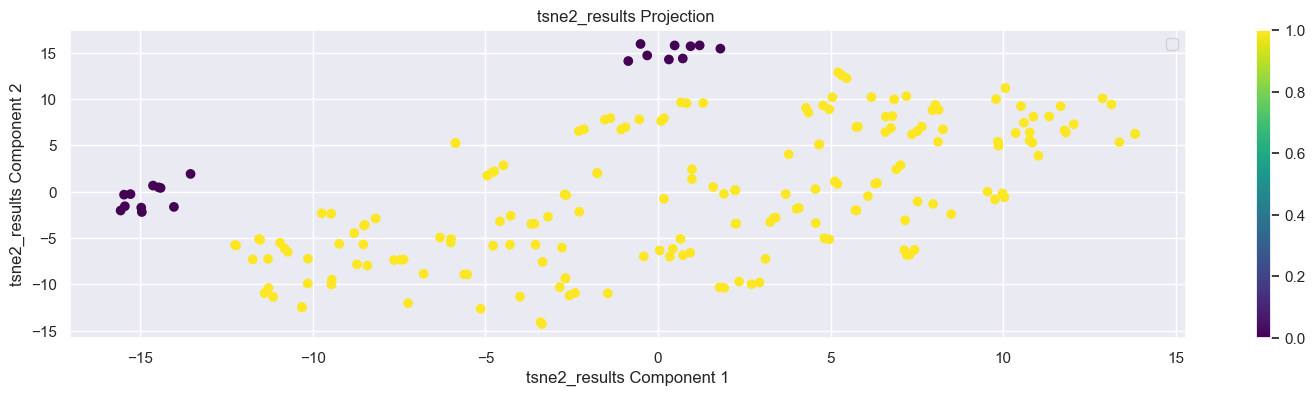

In [247]:
np.random.seed(42)
tsne2=TSNE(n_components=2)
tsne2_results=tsne2.fit_transform(preprocessed_data)
print(tsne2_results.shape)
plt.figure(figsize=(18, 4))
plt.scatter(tsne2_results[:, 0], tsne2_results[:, 1],c=y,cmap='viridis')
plt.legend()
plt.title("tsne2_results Projection ")
plt.xlabel("tsne2_results Component 1")
plt.ylabel("tsne2_results Component 2")
plt.colorbar()
plt.grid(True)
plt.show();

In [248]:
np.random.seed(42)
tsne3=TSNE(n_components=3)
tsne3_results=tsne3.fit_transform(preprocessed_data)
fig=px.scatter_3d(
    tsne3_results,x=0,y=1,z=2,color=y
)
fig.update_layout(
    title_text="tsne3_results Projection",
    legend_title_text='y'    
)
fig.show()

---
### *UMAP*

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


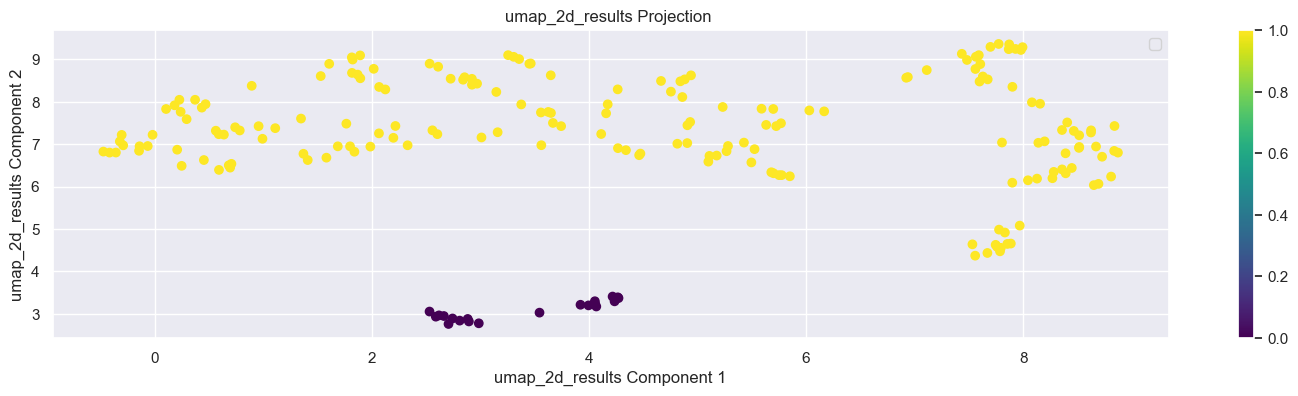

In [251]:
np.random.seed(42)
from umap import UMAP
umap_2d=UMAP(n_components=2)
umap_2d_results=umap_2d.fit_transform(preprocessed_data)
plt.figure(figsize=(18, 4))
plt.scatter(umap_2d_results[:, 0], umap_2d_results[:, 1],c=y,cmap='viridis')
plt.legend()
plt.title("umap_2d_results Projection ")
plt.xlabel("umap_2d_results Component 1")
plt.ylabel("umap_2d_results Component 2")
plt.colorbar()
plt.grid(True)
plt.show();

In [252]:
np.random.seed(42)
from umap import UMAP
umap_3d=UMAP(n_components=3)
umap_3d_results=umap_3d.fit_transform(preprocessed_data)
fig=px.scatter_3d(
    umap_3d_results,x=0,y=1,z=2,color=y
)
fig.update_layout(
    title_text="umap_3d_results Projection",
    legend_title_text='y'    
)
fig.show()

---
### *Isomap*

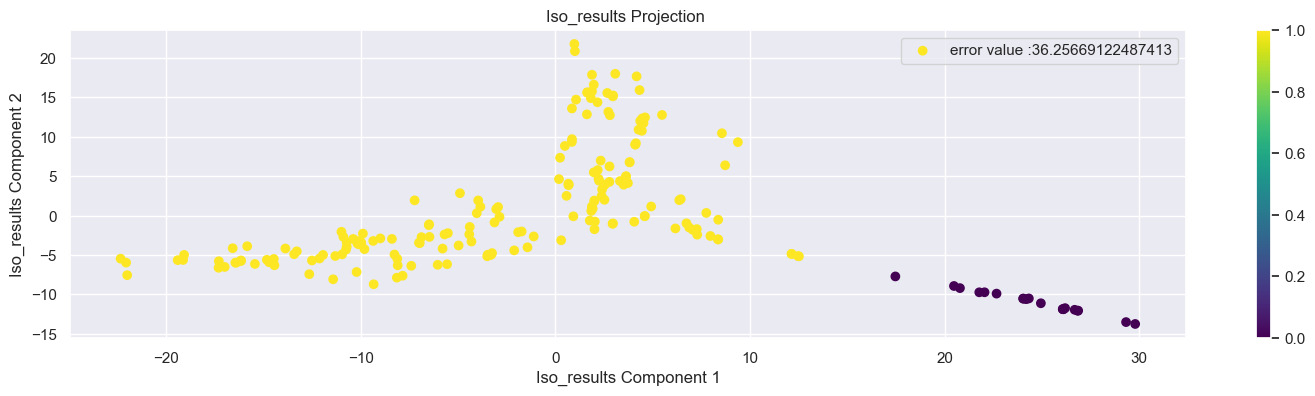

In [257]:
np.random.seed(42)
from sklearn.manifold import Isomap  #Maintains global manifold structure using geodesic distances
Iso=Isomap(n_components=3)
Iso_results=Iso.fit_transform(preprocessed_data)
plt.figure(figsize=(18, 4))
plt.scatter(Iso_results[:, 0], Iso_results[:, 1],c=y,cmap='viridis',label=f"error value :{Iso.reconstruction_error()}")
plt.legend()
plt.title("Iso_results Projection ")
plt.xlabel("Iso_results Component 1")
plt.ylabel("Iso_results Component 2")
plt.colorbar()
plt.grid(True)
plt.show();

In [217]:
np.random.seed(42)
from umap import UMAP
Iso_3c=Isomap(n_components=3)
Iso_3c_results=Iso_3c.fit_transform(preprocessed_data)
fig=px.scatter_3d(
    Iso_3c_results,x=0,y=1,z=2,color=y
)
fig.update_layout(
    title_text="Iso_3c_results Projection",
    legend_title_text='y'    
)
fig.show()

---
### *LocallyLinearEmbedding*

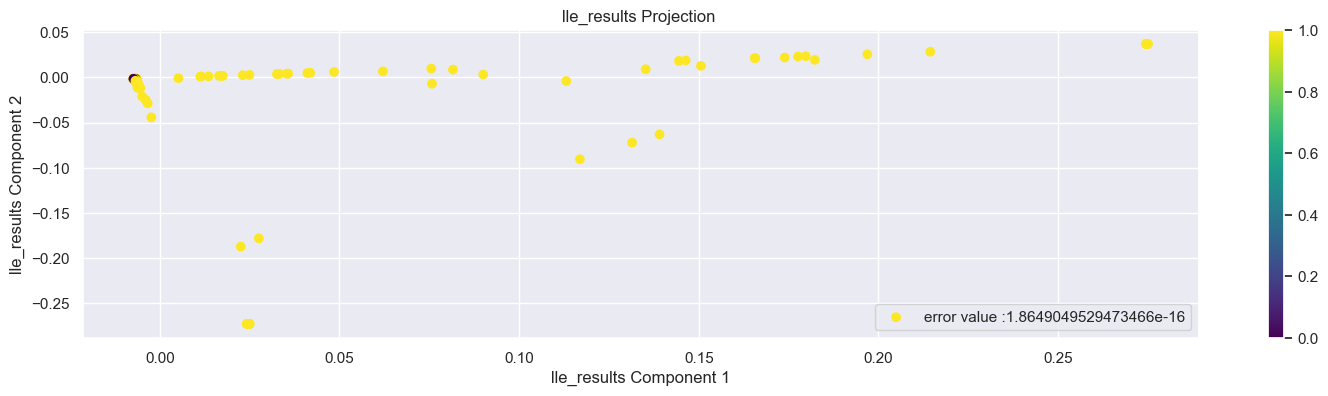

In [262]:
np.random.seed(42)
from sklearn.manifold import LocallyLinearEmbedding
lle=LocallyLinearEmbedding(n_components=2)
lle_results=lle.fit_transform(preprocessed_data)
plt.figure(figsize=(18, 4))
plt.scatter(lle_results[:, 0], lle_results[:, 1],c=y,cmap='viridis',label=f"error value :{lle.reconstruction_error_}")
plt.legend(loc="lower right")
plt.title("lle_results Projection ")
plt.xlabel("lle_results Component 1")
plt.ylabel("lle_results Component 2")
plt.colorbar()
plt.grid(True)
plt.show();

In [263]:
np.random.seed(42)
from umap import UMAP
lle_3c=LocallyLinearEmbedding(n_components=3)
lle_3c_results=lle_3c.fit_transform(preprocessed_data)
fig=px.scatter_3d(
    lle_3c_results,x=0,y=1,z=2,color=y
)
fig.update_layout(
    title_text="lle_3c_results Projection",
    legend_title_text='y'    
)
fig.show()

---
### *KernelPCA*

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


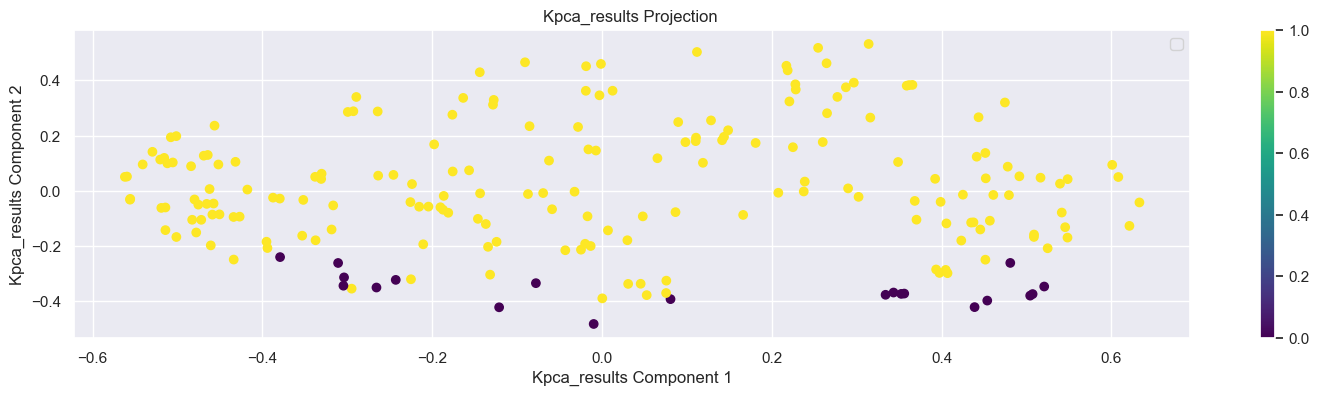

In [264]:
np.random.seed(42)
from sklearn.decomposition import KernelPCA
Kpca=KernelPCA(n_components=2,kernel="rbf")
Kpca_results=Kpca.fit_transform(preprocessed_data)
plt.figure(figsize=(18, 4))
plt.scatter(Kpca_results[:, 0], Kpca_results[:, 1],c=y,cmap='viridis')
plt.legend()
plt.title("Kpca_results Projection ")
plt.xlabel("Kpca_results Component 1")
plt.ylabel("Kpca_results Component 2")
plt.colorbar()
plt.grid(True)
plt.show();

In [265]:
np.random.seed(42)
from umap import UMAP
Kpca_3c=KernelPCA(n_components=3,kernel="rbf")
Kpca_3c_results=Kpca_3c.fit_transform(preprocessed_data)
fig=px.scatter_3d(
    Kpca_3c_results,x=0,y=1,z=2,color=y
)
fig.update_layout(
    title_text="Kpca_3c_results Projection",
    legend_title_text='y'    
)
fig.show()

* *Visualize all in one plot*

In [266]:
def plot_Dimentions_Reduction(model_results, X, y):
    plt.scatter(model_results[:, 0], model_results[:, 1],c=y,cmap='viridis')
    
def plot_multiple_Dimentions_Reduction(estimators, data, target, seed=None, cols=2, figsize=(25, 10)):
    if seed is not None:
        np.random.seed(seed)
    
    n = len(estimators)
    rows = (n + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()
    
    for ax, (name, est) in zip(axes, estimators):
        plt.sca(ax)  # set current axis
        plot_Dimentions_Reduction(est, data, target)
        ax.set_title(f"Dimentions_Reduction Method: {name}")
        ax.legend()
    
    for ax in axes[n:]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show();

In [267]:
estimators = [
    ("pca_99_results",pca_99_results),
    ("tsne2_results",tsne2_results),
    ("umap_2d_results",umap_2d_results),
    ("Iso_results",Iso_results),
    ("Kpca_results", Kpca_results),
    ("lle_results",lle_results)
]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


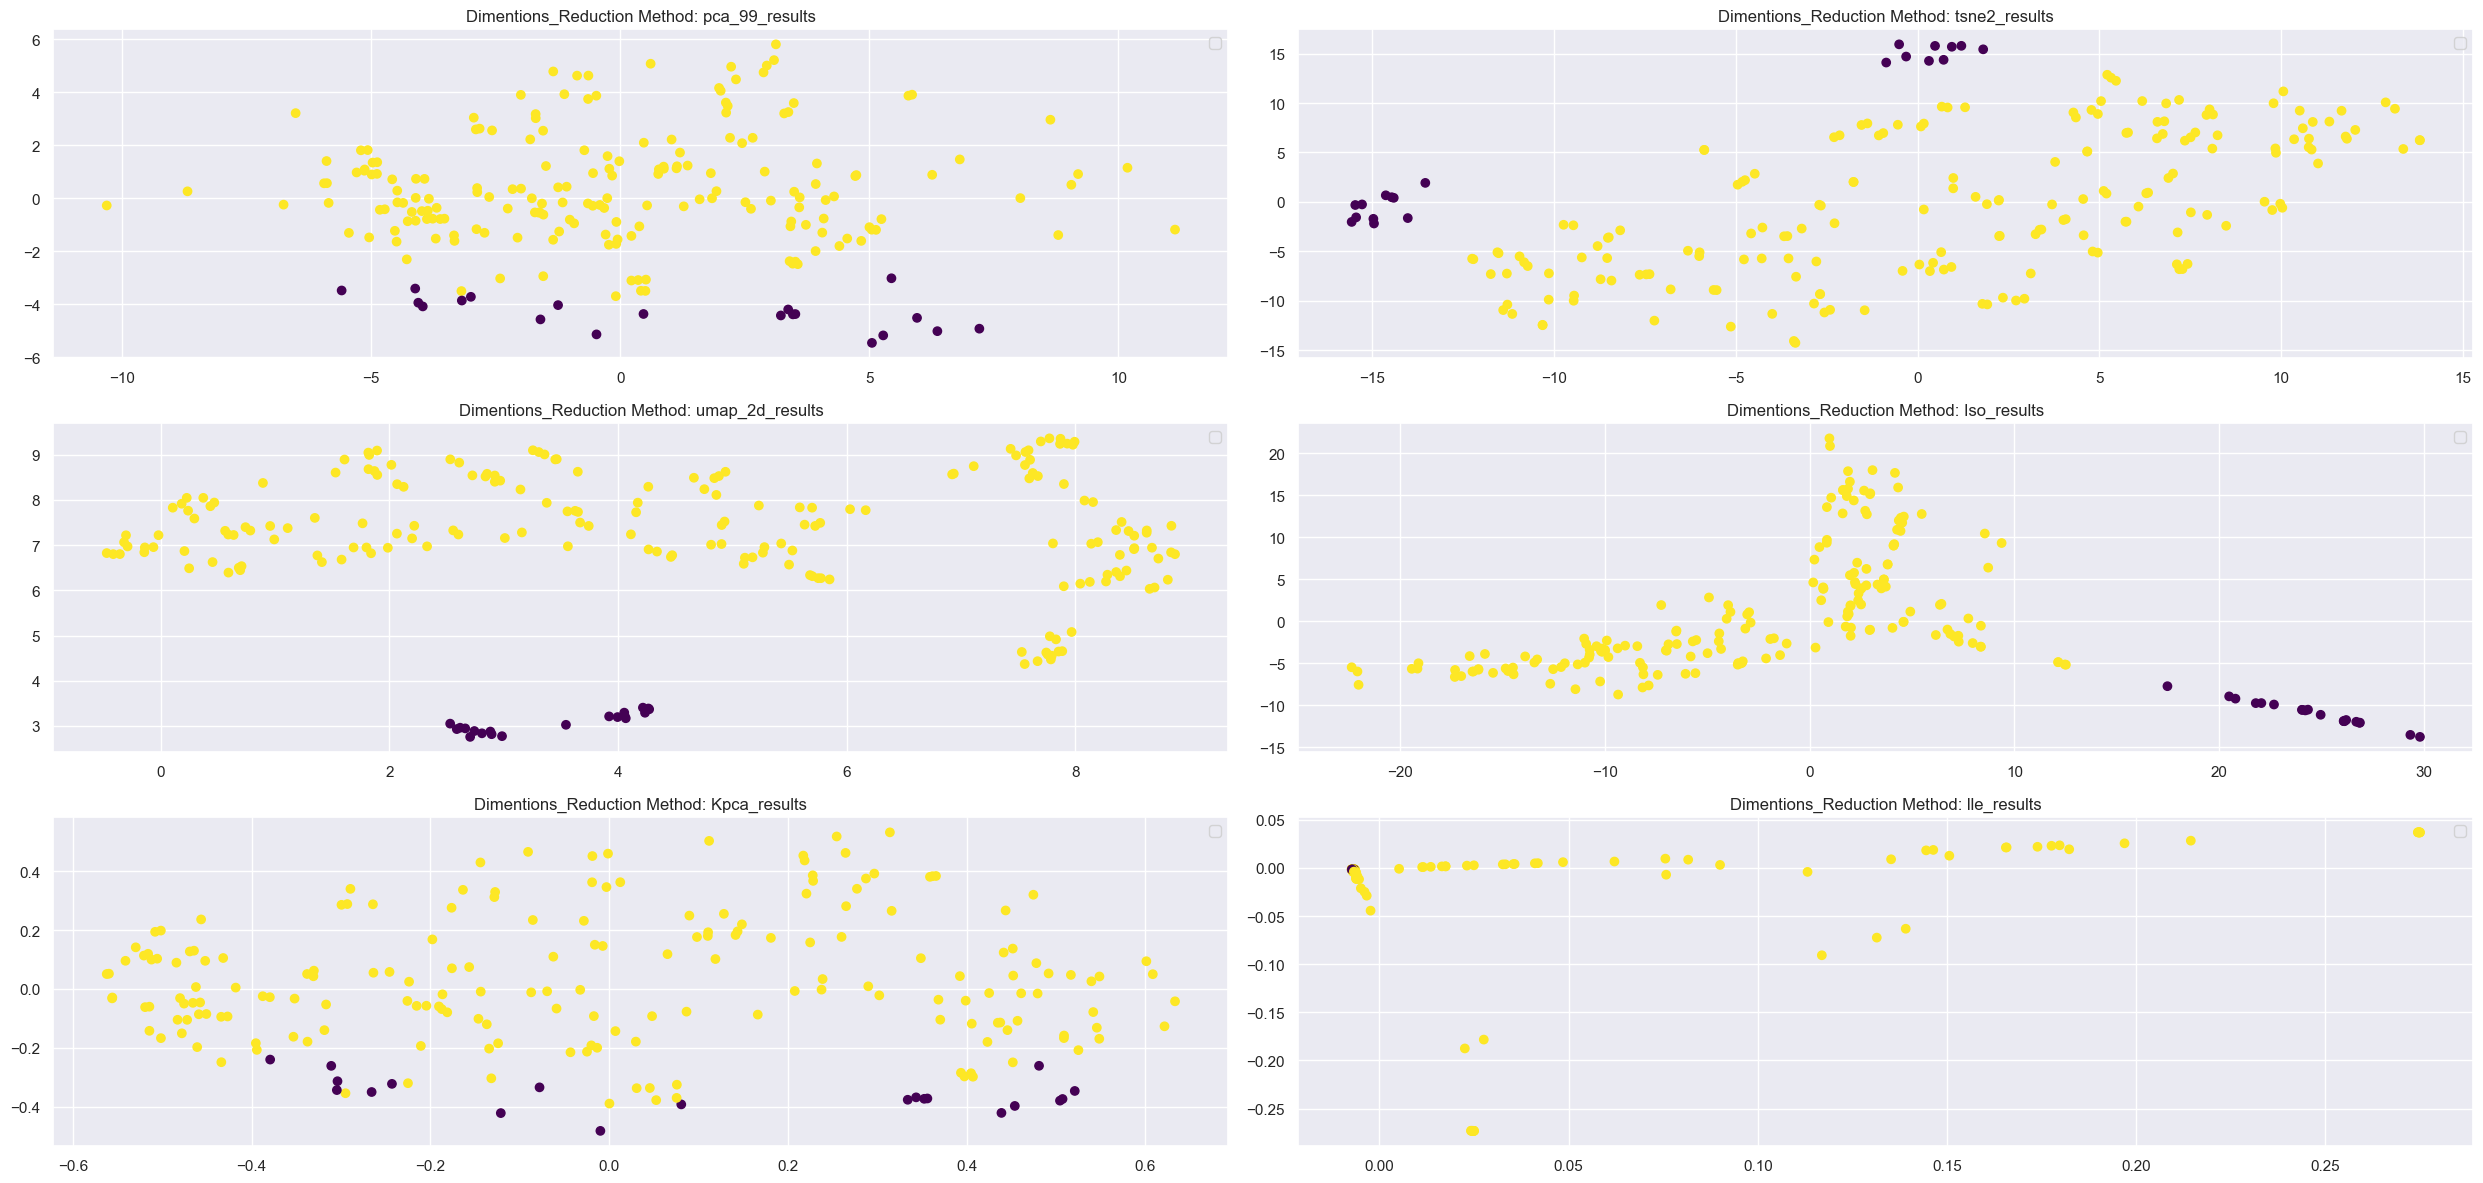

In [268]:
plot_multiple_Dimentions_Reduction(estimators, preprocessed_data, y, seed=None, cols=2, figsize=(25, 12));